In [119]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

In [120]:
air_jordan_df = pd.read_csv(os.path.join("air_jordan.csv"))

In [121]:
air_jordan_df.head(5)

,Unnamed: 0,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg
0,0,air_ba937bf13d40fb24,2016-01-13,25,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Wednesday,0
1,1,air_25e9888d30b386df,2016-01-13,21,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,Wednesday,0
2,2,air_fd6aac1043520e83,2016-01-13,40,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Wednesday,0
3,3,air_64d4491ad8cdb1c6,2016-01-13,5,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Wednesday,0
4,4,air_ee3a01f0c71a769f,2016-01-13,18,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,Wednesday,0


In [122]:
air_jordan_df["air_genre_name"].unique()

array(['Dining bar', 'Izakaya', 'Cafe/Sweets', 'Italian/French', 'Other',
       'Yakiniku/Korean food', 'Japanese food',
       'Okonomiyaki/Monja/Teppanyaki', 'Bar/Cocktail', 'Creative cuisine',
       'Western food', 'Asian', 'International cuisine', 'Karaoke/Party'],
      dtype=object)

In [123]:
genre_convert =[]
genre = air_jordan_df["air_genre_name"].unique()
for i in range(len(genre)):
    genre_convert.append(i)
    

In [124]:
#genre_zip = zip(genre, genre_convert)


In [127]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
air_jordan_df["air_genre_name"] = number.fit_transform(air_jordan_df["air_genre_name"].astype('str'))
air_jordan_df["air_area_name"] = number.fit_transform(air_jordan_df["air_area_name"].astype('str'))
air_jordan_df["visit_date"] = number.fit_transform(air_jordan_df["visit_date"].astype('str'))
air_jordan_df["day_of_week"] = number.fit_transform(air_jordan_df["day_of_week"].astype('str'))
new_aj_df = air_jordan_df[["air_genre_name","air_area_name","visit_date","day_of_week","visitors"]]
new_aj_df.head(5)

,air_genre_name,air_area_name,visit_date,day_of_week,visitors
0,12,62,24,6,25
1,3,77,24,6,21
2,3,62,24,6,40
3,12,62,24,6,5
4,10,31,24,6,18


In [128]:
features = ['air_genre_name','air_area_name','visit_date','day_of_week']
X = new_aj_df[list(features)].values
y = new_aj_df['visitors'].values

In [129]:
X

array([[12, 62, 24,  6],
       [ 3, 77, 24,  6],
       [ 3, 62, 24,  6],
       ...,
       [10, 80,  1,  2],
       [ 1,  2,  1,  2],
       [ 2, 72,  1,  2]], dtype=int64)

In [130]:
y

array([25, 21, 40, ...,  9,  8, 15], dtype=int64)

In [131]:
y = y.reshape(-1,1)
y.shape

(252108, 1)

In [132]:
X.shape

(252108, 4)

In [133]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [134]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

C:\Users\Eric Tsai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [135]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

C:\Users\Eric Tsai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [136]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

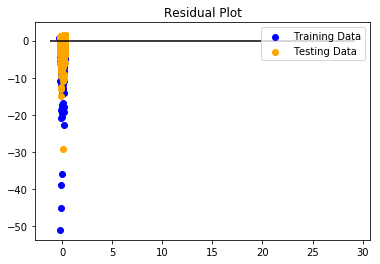

In [137]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [138]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9351269431140118, R2: 0.010702577238043132
